In [1]:
# Pacotes necessários para a análise exploratória
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path

In [2]:
 # Função para plotagem dos mapas de correlação
def plot_heatmap(height, data):
    plt.figure(figsize=(height,height*0.75))
    return sns.heatmap(data.corr(), vmin=-1, center=0, vmax=1)

In [3]:
try:
    data_path = os.path.join(os.path.dirname(os.path.realpath('__file__')),'data.csv')
    my_abs_path = Path(data_path).resolve(strict=True)
except FileNotFoundError:
    data=pd.read_csv('http://www.aneel.gov.br/dados/relatorios?p_p_id=dadosabertos_WAR_dadosabertosportlet&p_p_lifecycle=2&p_p_state=normal&p_p_mode=view&p_p_resource_id=gerarGeracaoFonteCSV&p_p_cacheability=cacheLevelPage&p_p_col_id=column-2&p_p_col_count=1')
    data.to_csv(data_path)
else:
    data=pd.read_csv(data_path)

In [4]:
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento
0,0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00
1,1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00
2,2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00
3,3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00
4,4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00


In [5]:
data['competencia'] = data['anoReferencia'] + data['mesReferencia'] / 12 - 1/12
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00,2000.0
1,1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00,2001.0
2,2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00,2002.0
3,3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00,2003.0
4,4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00,2004.0


In [6]:
data[data['nomFonteGeracao'] == 'Biomassas'].sort_values(by=['competencia']).head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia
0,0,1,Biomassas,0.0000,1,2000,13/09/2017 00:00:00,2000.000000
69,69,70,Biomassas,0.0000,2,2000,13/09/2017 00:00:00,2000.083333
87,87,88,Biomassas,0.0000,3,2000,13/09/2017 00:00:00,2000.166667
105,105,106,Biomassas,358.8856,4,2000,13/09/2017 00:00:00,2000.250000
122,122,123,Biomassas,0.0000,5,2000,13/09/2017 00:00:00,2000.333333


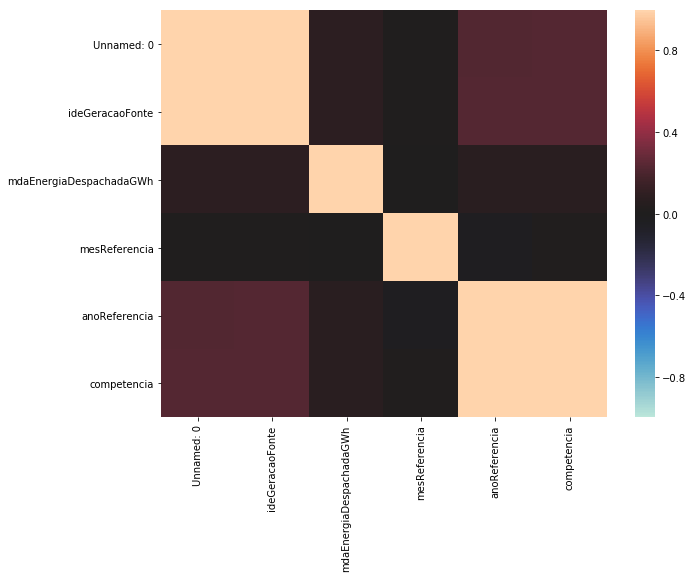

In [7]:
 # Imprime a matriz de correlação entre as variáveis
ax = plot_heatmap(10, data)

In [8]:
print(set(data['nomFonteGeracao']))

{'Gas Natural', 'Itaipu', 'Biomassas', 'Carvao', 'Hidreletricas exclusive Itaipu', 'Oleo Diesel / Combustivel', 'Energia produzida fora do SIN', 'Nuclear', 'Eolicas', 'Residuos Processos Industriais'}


In [9]:
#data = data.sort_values(by=['competencia'])
#data = data.reset_index(drop=True)
#data.head()

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
data['FonteGeracao'] = label_encoder.fit_transform(data['nomFonteGeracao'])
data_onehot = pd.get_dummies(data['FonteGeracao']).rename(index=str, columns={0: "is_biomass", 1: "is_coal", 2: "is_outSIN", 3:"is_eolic", 4:"is_natGas", 5:"is_hidrelectric", 6:"is_itaipu", 7:"is_nuclear", 8:"is_oil", 9:"is_residual"})
data_onehot.head()

,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [11]:
data_onehot.head()

,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [12]:
data.reset_index(drop=True, inplace=True)
data_onehot.reset_index(drop=True, inplace=True)
data = pd.concat([data, data_onehot], axis=1)
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia,FonteGeracao,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,0,1,Biomassas,0.00000,1,2000,13/09/2017 00:00:00,2000.0,0,1,0,0,0,0,0,0,0,0,0
1,1,2,Biomassas,0.00000,1,2001,13/09/2017 00:00:00,2001.0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,Biomassas,0.00000,1,2002,13/09/2017 00:00:00,2002.0,0,1,0,0,0,0,0,0,0,0,0
3,3,4,Biomassas,0.05547,1,2003,13/09/2017 00:00:00,2003.0,0,1,0,0,0,0,0,0,0,0,0
4,4,5,Biomassas,0.00000,1,2004,13/09/2017 00:00:00,2004.0,0,1,0,0,0,0,0,0,0,0,0


In [13]:
data = data.sort_values(by=['competencia'])
data.reset_index(drop=True, inplace=True)
data.head()

,Unnamed: 0,ideGeracaoFonte,nomFonteGeracao,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,dthProcessamento,competencia,FonteGeracao,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,0,1,Biomassas,0.000000,1,2000,13/09/2017 00:00:00,2000.0,0,1,0,0,0,0,0,0,0,0,0
1,414,415,Energia produzida fora do SIN,NaN,1,2000,13/09/2017 00:00:00,2000.0,2,0,0,1,0,0,0,0,0,0,0
2,621,622,Eolicas,0.000000,1,2000,13/09/2017 00:00:00,2000.0,3,0,0,0,1,0,0,0,0,0,0
3,207,208,Carvao,772.954908,1,2000,13/09/2017 00:00:00,2000.0,1,0,1,0,0,0,0,0,0,0,0
4,1656,1657,Oleo Diesel / Combustivel,112.026593,1,2000,13/09/2017 00:00:00,2000.0,8,0,0,0,0,0,0,0,0,1,0


In [14]:
legend = data[['nomFonteGeracao','FonteGeracao']].tail(10).sort_values(by=['FonteGeracao'])
legend = legend.reset_index(drop=True)
legend

,nomFonteGeracao,FonteGeracao
0,Biomassas,0
1,Carvao,1
2,Energia produzida fora do SIN,2
3,Eolicas,3
4,Gas Natural,4
5,Hidreletricas exclusive Itaipu,5
6,Itaipu,6
7,Nuclear,7
8,Oleo Diesel / Combustivel,8
9,Residuos Processos Industriais,9


In [15]:
data = data.drop(columns=['Unnamed: 0','ideGeracaoFonte','nomFonteGeracao','dthProcessamento'])
data.head()

,mdaEnergiaDespachadaGWh,mesReferencia,anoReferencia,competencia,FonteGeracao,is_biomass,is_coal,is_outSIN,is_eolic,is_natGas,is_hidrelectric,is_itaipu,is_nuclear,is_oil,is_residual
0,0.000000,1,2000,2000.0,0,1,0,0,0,0,0,0,0,0,0
1,NaN,1,2000,2000.0,2,0,0,1,0,0,0,0,0,0,0
2,0.000000,1,2000,2000.0,3,0,0,0,1,0,0,0,0,0,0
3,772.954908,1,2000,2000.0,1,0,1,0,0,0,0,0,0,0,0
4,112.026593,1,2000,2000.0,8,0,0,0,0,0,0,0,0,1,0


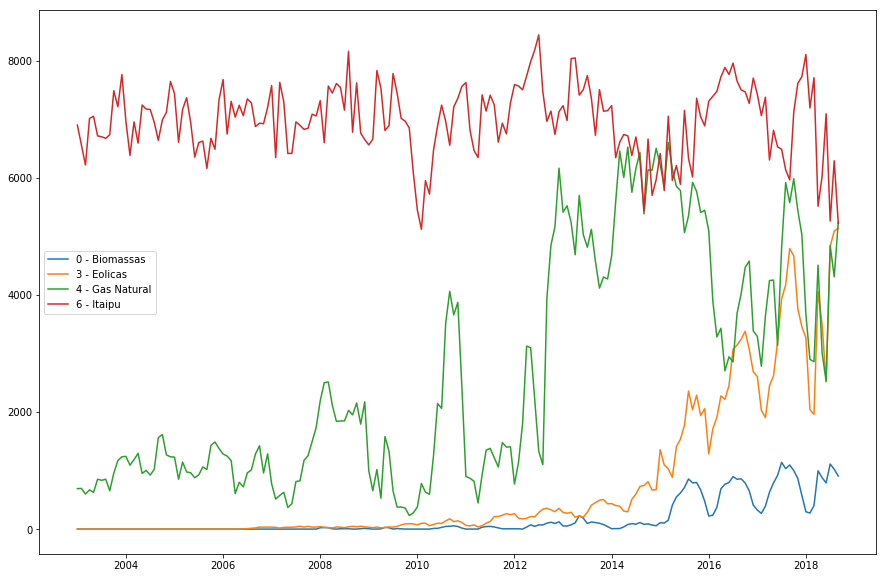

In [35]:
plt.figure(figsize=(15,10))
for index, row in legend.iterrows():
    if index not in [5,9,8,1,2,7]:
        plt.plot('competencia','mdaEnergiaDespachadaGWh',data=data[(data['FonteGeracao'] == index) & (data['anoReferencia'] > 2002)], label=str(index) + ' - ' + row.nomFonteGeracao)
plt.legend()

In [59]:
data['mdaEnergiaDespachadaGWh'] = data['mdaEnergiaDespachadaGWh'].fillna(0)

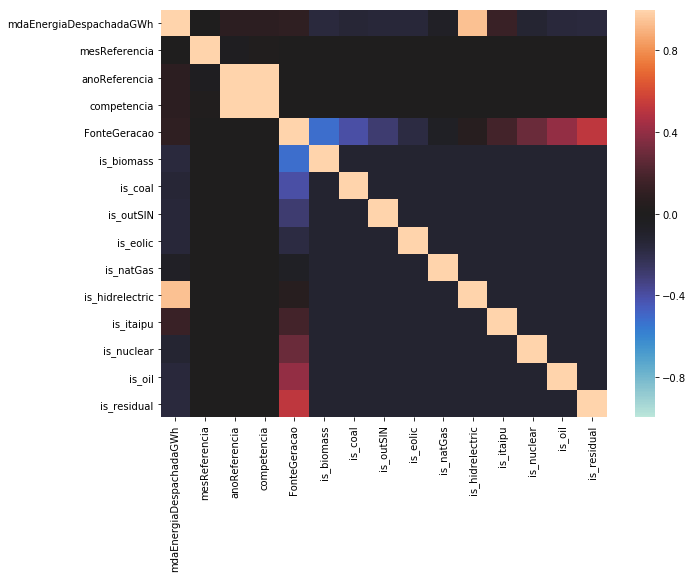

In [18]:
 # Imprime a matriz de correlação entre as variáveis
ax = plot_heatmap(10, data)

In [60]:
t = data[['competencia','mdaEnergiaDespachadaGWh']][(data['FonteGeracao'] == 0)]
t.head()

,competencia,mdaEnergiaDespachadaGWh
0,2000.000000,0.0000
11,2000.083333,0.0000
23,2000.166667,0.0000
37,2000.250000,358.8856
40,2000.333333,0.0000


In [61]:
t['mdaEnergiaDespachadaGWh + 1'] = t['mdaEnergiaDespachadaGWh'].shift(-1)
t.head()

,competencia,mdaEnergiaDespachadaGWh,mdaEnergiaDespachadaGWh + 1
0,2000.000000,0.0000,0.0000
11,2000.083333,0.0000,0.0000
23,2000.166667,0.0000,358.8856
37,2000.250000,358.8856,0.0000
40,2000.333333,0.0000,0.0000


In [83]:
train = t[t['competencia'] < 2016]
test = t[t['competencia'] >= 2016]
x_train = train['mdaEnergiaDespachadaGWh']
y_train = train['mdaEnergiaDespachadaGWh + 1']
x_test = test['mdaEnergiaDespachadaGWh']
y_test = test['mdaEnergiaDespachadaGWh + 1']

In [76]:
x_train.head()

0       0.0000
11      0.0000
23      0.0000
37    358.8856
40      0.0000
Name: mdaEnergiaDespachadaGWh, dtype: float64

In [79]:
y_train.head()

0       0.0000
11      0.0000
23    358.8856
37      0.0000
40      0.0000
Name: mdaEnergiaDespachadaGWh + 1, dtype: float64

In [110]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
lrModel = lr.fit(x_train, y_train)

In [112]:
import math
print('R²: ',lrModel.score(x_train, y_train))
print('Corr.: ',math.sqrt(lrModel.score(x_train, y_train)))

R²:  0.8654846053564444
Corr.:  0.9303142508617421


In [113]:
x_test.values.reshape(-1, 1).shape
y_pred = lrModel.predict(x_test.values.reshape(-1, 1))

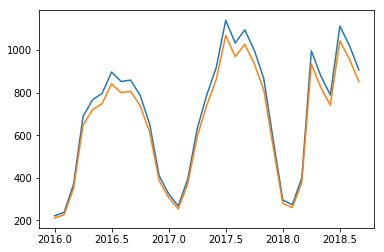

In [115]:
plt.plot(test['competencia'],test['mdaEnergiaDespachadaGWh'])
plt.plot(test['competencia'],y_pred)